In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [2]:
housing = pd.read_csv('train.csv', index_col=0)
housing_test = pd.read_csv('test.csv', index_col=0)
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
housing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


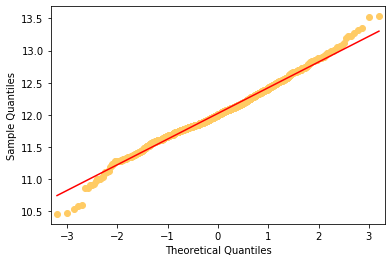

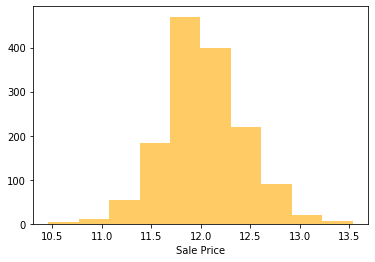

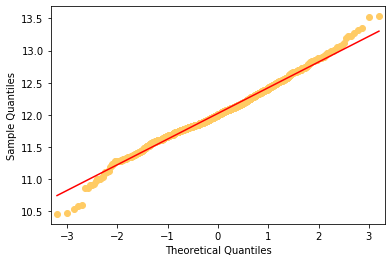

In [3]:
plt.xlabel('Sale Price')
plt.hist(np.log(housing['SalePrice']), color='#ffcb64')
sm.qqplot(np.log(housing['SalePrice']),color='#ffcb64', line='s')

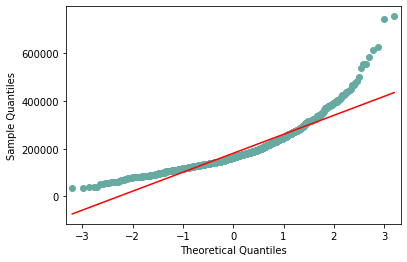

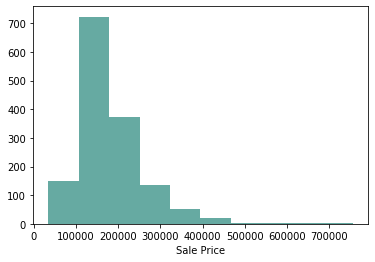

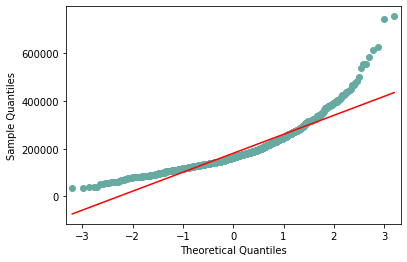

In [4]:
plt.xlabel('Sale Price')
plt.hist(housing['SalePrice'], color='#66aaa2')
sm.qqplot(housing['SalePrice'],color='#66aaa2', line='s')

<BarContainer object of 19 artists>

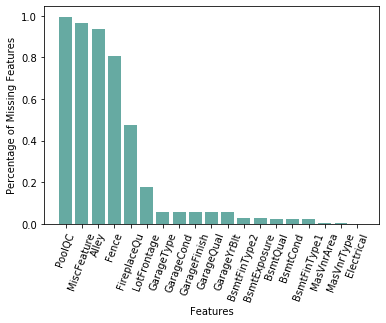

In [5]:
train_null_val_perc = housing.isnull().mean().sort_values(ascending=False)
train_null_val_perc = train_null_val_perc[train_null_val_perc > 0]

plt.xticks(rotation='70')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Features')
plt.bar(x=train_null_val_perc.index, height=train_null_val_perc, color='#66aaa2')

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageFinish', 'GarageYrBlt', 'GarageQual', 'GarageType',
       'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtHalfBath', 'Utilities',
       'Functional', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Exterior2nd', 'SaleType', 'Exterior1st', 'KitchenQual',
       'GarageArea', 'GarageCars'],
      dtype='object')

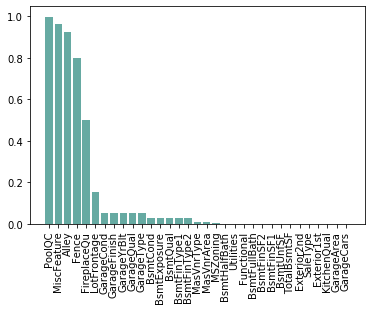

In [6]:
test_null_val_perc = housing_test.isnull().mean().sort_values(ascending=False)
test_null_val_perc = test_null_val_perc[test_null_val_perc > 0]
plt.xticks(rotation='90')
plt.bar(x=test_null_val_perc.index, height=test_null_val_perc, color='#66aaa2')
test_null_val_perc.index

In [7]:
train_na = housing.loc[:,train_null_val_perc.index]
test_na = housing_test.loc[:,test_null_val_perc.index]
print(train_na.dtypes[train_na.dtypes != 'object'])
print(50*'-')
print(test_na.dtypes[test_na.dtypes != 'object'])

LotFrontage    float64
GarageYrBlt    float64
MasVnrArea     float64
dtype: object
--------------------------------------------------
LotFrontage     float64
GarageYrBlt     float64
MasVnrArea      float64
BsmtHalfBath    float64
BsmtFullBath    float64
BsmtFinSF2      float64
BsmtFinSF1      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
GarageArea      float64
GarageCars      float64
dtype: object


In [8]:
for col in test_na:
    if test_na[col].dtypes != 'object':
        housing_test[col] = housing_test[col].fillna(0)
    else:
        housing_test[col] = housing_test[col].fillna('None')

In [9]:
for col in train_na:
    if train_na[col].dtypes != 'object':
        housing[col] = housing[col].fillna(0)
    else:
        housing[col] = housing[col].fillna('None')

In [10]:
conv_to_obj = ['MSSubClass','YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

for col in conv_to_obj:
    housing[col] = housing[col].apply(str)
    housing_test[col] = housing_test[col].apply(str)

In [11]:
zero_cols = housing.loc[:, (housing == 0).any()].columns.to_list()
zero_cols

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

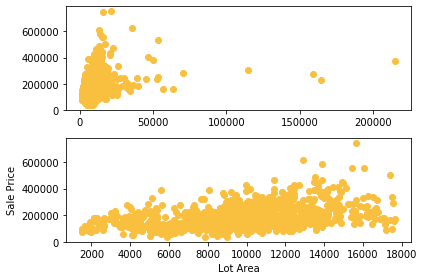

In [12]:
lot_area_Q1 = housing['LotArea'].quantile(.25)
lot_area_Q3 = housing['LotArea'].quantile(.75)
lot_area_IQR = lot_area_Q3 - lot_area_Q1
lot_area_lower_bound = lot_area_Q1 - 1.5 * lot_area_IQR
lot_area_upper_bound = lot_area_Q3 + 1.5 * lot_area_IQR
lot_area_no_outlier = housing.loc[(housing['LotArea'] > lot_area_lower_bound) & (housing['LotArea'] < lot_area_upper_bound)]

fig, ax = plt.subplots(2,1, figsize=(6,4))
ax1 = ax[0]
ax2 = ax[1]
ax1.scatter(x=housing['LotArea'], y=housing['SalePrice'], color='#f9bf3e')
ax2.scatter(x=lot_area_no_outlier['LotArea'], y=lot_area_no_outlier['SalePrice'], color='#f9bf3e')
plt.ylabel('Sale Price')
plt.xlabel('Lot Area')
plt.tight_layout()

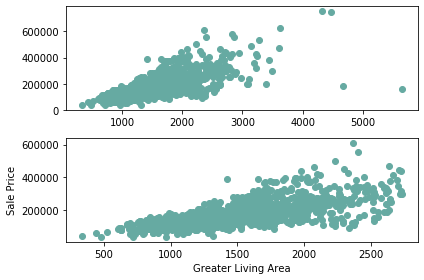

In [13]:
grlivarea_Q1 = housing['GrLivArea'].quantile(.25)
grlivarea_Q3 = housing['GrLivArea'].quantile(.75)
grlivarea_IQR = grlivarea_Q3 - grlivarea_Q1
grlivarea_lower_bound = grlivarea_Q1 - 1.5 * grlivarea_IQR
grlivarea_upper_bound = grlivarea_Q3 + 1.5 * grlivarea_IQR
grlivarea_no_outlier = housing.loc[(housing['GrLivArea'] > grlivarea_lower_bound) & (housing['GrLivArea'] < grlivarea_upper_bound)]

fig, ax = plt.subplots(2,1, figsize=(6,4))
ax1 = ax[0]
ax2 = ax[1]
ax1.scatter(x=housing['GrLivArea'], y=housing['SalePrice'], color='#66aaa2')
ax2.scatter(x=grlivarea_no_outlier['GrLivArea'], y=grlivarea_no_outlier['SalePrice'], color='#66aaa2')
plt.ylabel('Sale Price')
plt.xlabel('Greater Living Area')
plt.tight_layout()

In [85]:
merged_housing = pd.concat([lot_area_no_outlier, grlivarea_no_outlier], join='inner' )
merged_housing = merged_housing.drop_duplicates()
merged_housing


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,20,RL,0.0,57200,Pave,None,IR1,Bnk,AllPub,Inside,...,0,None,None,None,0,6,2010,WD,Normal,160000
1410,60,RL,46.0,20544,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,None,MnPrv,None,0,11,2008,WD,Normal,215000
1424,80,RL,0.0,19690,Pave,None,IR1,Lvl,AllPub,CulDSac,...,738,Gd,GdPrv,None,0,8,2006,WD,Alloca,274970


In [86]:
train_sale_price = np.log(merged_housing['SalePrice'])
merged_housing = merged_housing.drop('SalePrice',axis=1)
train_sale_price

Id
1       12.247694
2       12.109011
3       12.317167
4       11.849398
5       12.429216
          ...    
1397    11.982929
1410    12.278393
1424    12.524417
1431    12.165980
1447    11.969717
Name: SalePrice, Length: 1451, dtype: float64

In [87]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error
import math
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [29]:
housing_copy.select_dtypes(include =['int64', 'float64'])
num_housing = housing_copy.select_dtypes(include =['int64', 'float64'])
ridge.fit(num_housing, train_sale_price)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
pd.Series(ridge.coef_, index=num_housing.columns)
ridge.score(num_housing, train_sale_price)
rmse = np.sqrt(mean_squared_error(train_sale_price, y_predict))
print('the rmse is: %.2f' %(rmse))

the ridge intercept is: 10.47


NameError: name 'y_predict' is not defined

In [35]:
housing_test_copy = housing_test 

In [88]:
merged_housing.select_dtypes(include =['int64', 'float64'])
merged_housing = merged_housing.select_dtypes(include = ['int64', 'float64'])
ridge.fit(merged_housing, train_sale_price)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
print(pd.Series(ridge.coef_, index=merged_housing.columns))
print(ridge.score(merged_housing, train_sale_price))
ridge_r2 = ridge.score(merged_housing, train_sale_price)
ridge_y_predict = ridge.predict(merged_housing)
ridge_rmse = np.sqrt(mean_squared_error(train_sale_price, ridge_y_predict))
print('the rmse is: %.2f' %(rmse))
print('the r-squared is: %.2f' %(ridge_r2))

test_data = housing_test_copy.select_dtypes(include = ['int64', 'float64'])
test_predict = ridge.predict(test_data)
print(np.sqrt(mean_squared_error(train_sale_price, ridge_y_predict)))
print(np.exp(test_predict))

the ridge intercept is: 10.47
LotFrontage      2.047349e-04
LotArea          2.097513e-06
OverallQual      9.746992e-02
OverallCond      3.815503e-02
MasVnrArea       6.096256e-06
BsmtFinSF1       8.865766e-05
BsmtFinSF2       1.483319e-05
BsmtUnfSF        1.624627e-05
TotalBsmtSF      1.197373e-04
1stFlrSF         1.326892e-04
2ndFlrSF         8.119230e-05
LowQualFinSF    -1.393869e-04
GrLivArea        7.449459e-05
BsmtFullBath     4.692503e-02
BsmtHalfBath     1.257986e-02
FullBath         9.234832e-02
HalfBath         6.796600e-02
BedroomAbvGr    -1.438834e-02
KitchenAbvGr    -1.360010e-01
TotRmsAbvGrd     9.153483e-03
Fireplaces       2.372609e-02
GarageCars       5.739539e-02
GarageArea       1.136582e-04
WoodDeckSF       1.080136e-04
OpenPorchSF      5.267000e-05
EnclosedPorch   -2.072568e-04
3SsnPorch        1.633890e-04
ScreenPorch      1.283910e-04
PoolArea         7.121730e-05
MiscVal         -6.262343e-07
dtype: float64
0.8765081800220071
the rmse is: 0.14
the r-squared is: 

In [89]:
lasso.fit(merged_housing, train_sale_price)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
print(pd.Series(lasso.coef_, index=merged_housing.columns))
print(lasso.score(merged_housing, train_sale_price))
lasso_r2 = lasso.score(merged_housing, train_sale_price)
lasso_y_predict = lasso.predict(merged_housing)
lasso_rmse = np.sqrt(mean_squared_error(train_sale_price, lasso_y_predict))
print('the rmse is: %.2f' %(lasso_rmse))
print('the r-squared is: %.2f' %(lasso_r2))

lasso_test_predict = lasso.predict(test_data)
print(np.sqrt(mean_squared_error(train_sale_price, lasso_y_predict)))
print(np.exp(lasso_test_predict))

the ridge intercept is: 10.47
LotFrontage      0.000000
LotArea          0.000001
OverallQual      0.000000
OverallCond      0.000000
MasVnrArea       0.000066
BsmtFinSF1       0.000104
BsmtFinSF2      -0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000302
1stFlrSF         0.000000
2ndFlrSF         0.000102
LowQualFinSF    -0.000000
GrLivArea        0.000281
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr    -0.000000
KitchenAbvGr    -0.000000
TotRmsAbvGrd    -0.000000
Fireplaces       0.000000
GarageCars       0.000000
GarageArea       0.000482
WoodDeckSF       0.000163
OpenPorchSF      0.000062
EnclosedPorch   -0.000197
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal         -0.000003
dtype: float64
0.7557890133609413
the rmse is: 0.19
the r-squared is: 0.76
0.19493919306978297
[146715.24215099 165946.22941136 183264.51921503 ... 191260.03815365
 103749.98256504 231002.35

In [143]:
from sklearn import ensemble, tree
from sklearn.model_selection import GridSearchCV
import xgboost
dt = tree.DecisionTreeClassifier()
rf = ensemble.RandomForestRegressor()
bag = ensemble.BaggingRegressor()
xgb = xgboost.XGBRegressor(booster='gblinear')


In [101]:
rf.fit(merged_housing, train_sale_price)
print(rf.score(merged_housing, train_sale_price))
rf_r2 = rf.score(merged_housing, train_sale_price)
rf_y_predict = rf.predict(merged_housing)
rf_rmse = np.sqrt(mean_squared_error(train_sale_price, rf_y_predict))
print('the rmse is: %.2f' %(rf_rmse))
print('the r-squared is: %.2f' %(rf_r2))
rf.feature_importances_

rf_test_predict = rf.predict(test_data)
print(np.exp(rf_test_predict))

0.9817299296834614
the rmse is: 0.05
the r-squared is: 0.98
[125715.0503833  156198.91977844 172893.05732658 ... 165948.16420489
 104978.06354424 245415.90477523]


array([7.50185724e-03, 2.03855736e-02, 5.62669278e-01, 1.95599081e-02,
       4.79838241e-03, 3.02999698e-02, 1.13486686e-03, 1.05935072e-02,
       6.39201440e-02, 3.18798420e-02, 7.31158268e-03, 5.10761432e-04,
       1.13341504e-01, 1.85760344e-03, 8.67233381e-04, 3.96492921e-03,
       1.88975927e-03, 2.92787607e-03, 3.63243466e-03, 3.10209735e-03,
       9.49515835e-03, 4.16747220e-02, 3.53058877e-02, 6.28045773e-03,
       8.94008747e-03, 4.19457735e-03, 3.58902160e-04, 8.45934620e-04,
       1.27907608e-04, 6.27254853e-04])

In [134]:
bag.fit(merged_housing, train_sale_price)
print(bag.score(merged_housing, train_sale_price))
bag_r2 = bag.score(merged_housing, train_sale_price)
bag_y_predict = bag.predict(merged_housing)
bag_rmse = np.sqrt(mean_squared_error(train_sale_price, bag_y_predict))
print('the rmse is: %.2f' %(bag_rmse))
print('the r-squared is: %.2f' %(bag_r2))

bag_test_predict = bag.predict(test_data)
print(np.exp(bag_test_predict))
print(np.sqrt(mean_squared_error(train_sale_price, bag_y_predict)))

0.9734074592062469
the rmse is: 0.06
the r-squared is: 0.97
[135856.21398149 159274.0535763  176638.92466635 ... 184556.62118025
 111246.71711124 256159.02885132]
0.06432747163555091


[7.50185724e-03 2.03855736e-02 5.62669278e-01 1.95599081e-02
 4.79838241e-03 3.02999698e-02 1.13486686e-03 1.05935072e-02
 6.39201440e-02 3.18798420e-02 7.31158268e-03 5.10761432e-04
 1.13341504e-01 1.85760344e-03 8.67233381e-04 3.96492921e-03
 1.88975927e-03 2.92787607e-03 3.63243466e-03 3.10209735e-03
 9.49515835e-03 4.16747220e-02 3.53058877e-02 6.28045773e-03
 8.94008747e-03 4.19457735e-03 3.58902160e-04 8.45934620e-04
 1.27907608e-04 6.27254853e-04]


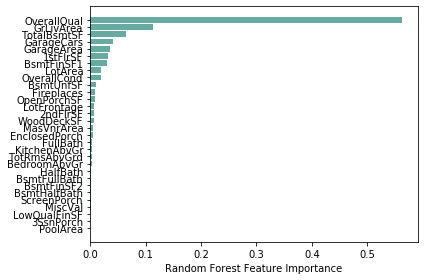

In [107]:
rf_idx = rf.feature_importances_.argsort()
print(rf.feature_importances_)
plt.barh(merged_housing.columns[rf_idx], rf.feature_importances_[rf_idx], color='#66aaa2')
plt.xlabel("Random Forest Feature Importance")
plt.tight_layout()

In [145]:
xgb.fit(merged_housing, train_sale_price)
print(xgb.score(merged_housing, train_sale_price))
xgb_r2 = xgb.score(merged_housing, train_sale_price)
xgb_y_predict = xgb.predict(merged_housing)
rmse = np.sqrt(mean_squared_error(train_sale_price, xgb_y_predict))
print('the rmse is: %.2f' %(rmse))
print(np.sqrt(mean_squared_error(train_sale_price, xgb_y_predict)))
print('the r-squared is: %.2f' %(xgb_r2))

xgb_test_predict = xgb.predict(test_data)
print(np.exp(xgb_test_predict))
print(pd.Series(xgb.coef_, index=merged_housing.columns))
xgb.coef_

0.35859231979609685
the rmse is: 0.32
0.31592474442829394
the r-squared is: 0.36
[106094.89 120760.99 107816.43 ... 198580.69  77405.49 210597.25]
LotFrontage     -0.000268
LotArea          0.000004
OverallQual      0.295663
OverallCond      0.202447
MasVnrArea      -0.000105
BsmtFinSF1       0.000558
BsmtFinSF2       0.000552
BsmtUnfSF        0.000471
TotalBsmtSF     -0.000451
1stFlrSF        -0.000078
2ndFlrSF        -0.000344
LowQualFinSF    -0.000073
GrLivArea        0.000139
BsmtFullBath     0.074095
BsmtHalfBath    -0.014119
FullBath         0.071611
HalfBath         0.121398
BedroomAbvGr     0.079566
KitchenAbvGr     0.587335
TotRmsAbvGrd     0.025129
Fireplaces       0.007405
GarageCars       0.076052
GarageArea       0.000081
WoodDeckSF       0.000009
OpenPorchSF     -0.000166
EnclosedPorch    0.000030
3SsnPorch        0.000121
ScreenPorch      0.000188
PoolArea         0.000051
MiscVal         -0.000031
dtype: float64


array([-2.67646e-04,  3.57712e-06,  2.95663e-01,  2.02447e-01,
       -1.05447e-04,  5.57902e-04,  5.52170e-04,  4.70832e-04,
       -4.50754e-04, -7.78748e-05, -3.43636e-04, -7.28286e-05,
        1.38713e-04,  7.40950e-02, -1.41187e-02,  7.16107e-02,
        1.21398e-01,  7.95665e-02,  5.87335e-01,  2.51294e-02,
        7.40516e-03,  7.60517e-02,  8.14993e-05,  9.24343e-06,
       -1.66140e-04,  2.98271e-05,  1.21268e-04,  1.87978e-04,
        5.14985e-05, -3.14430e-05])

[0.00248439 0.01217906 0.2714297  0.03390038 0.00382044 0.01468678
 0.00741747 0.00564752 0.08280537 0.01331774 0.00875884 0.00673157
 0.07161857 0.02469919 0.01257234 0.01706358 0.02640424 0.00559412
 0.02658015 0.00341116 0.11727753 0.15988293 0.00790038 0.00636675
 0.00928974 0.00986739 0.00349276 0.00697175 0.0173893  0.01043898]


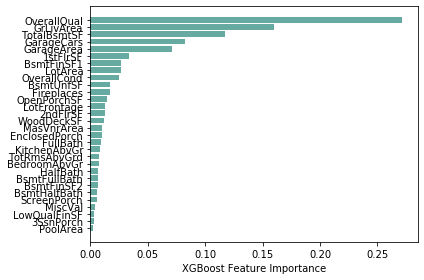

In [124]:
xgb_idx = xgb.feature_importances_.argsort()
print(xgb.feature_importances_)
plt.barh(merged_housing.columns[rf_idx], xgb.feature_importances_[xgb_idx], color='#66aaa2')
plt.xlabel("XGBoost Feature Importance")
plt.tight_layout()